<a href="https://colab.research.google.com/github/ammad19/DL_1Assignment/blob/main/flower_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [8]:
roses=list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/7147367479_f7a6ef0798.jpg'),
 PosixPath('datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15333843782_060cef3030.jpg'),
 PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg')]

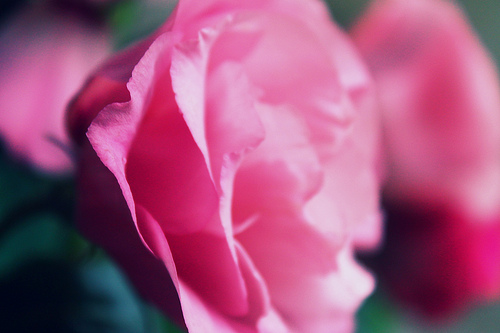

In [9]:
PIL.Image.open(str(roses[0]))

In [10]:
cv2.imread(str(roses[0]))

array([[[ 25,   9,   3],
        [ 25,   9,   3],
        [ 27,   8,   3],
        ...,
        [ 93, 103,  80],
        [ 94, 102,  79],
        [ 95, 101,  76]],

       [[ 25,   8,   5],
        [ 24,   8,   2],
        [ 26,   7,   2],
        ...,
        [ 92, 101,  81],
        [ 94, 100,  81],
        [ 95,  99,  80]],

       [[ 24,   7,   4],
        [ 26,   7,   4],
        [ 26,   7,   4],
        ...,
        [ 92, 105,  73],
        [ 93, 104,  72],
        [ 93, 104,  71]],

       ...,

       [[ 22,   5,   2],
        [ 22,   6,   0],
        [ 21,   5,   0],
        ...,
        [ 98,  97,  76],
        [ 99,  97,  73],
        [ 99,  98,  70]],

       [[ 22,   5,   2],
        [ 22,   6,   0],
        [ 22,   6,   0],
        ...,
        [ 99,  99,  75],
        [100,  99,  73],
        [ 99, 100,  68]],

       [[ 24,   5,   2],
        [ 22,   3,   0],
        [ 21,   5,   0],
        ...,
        [101, 101,  77],
        [102, 101,  73],
        [100, 101,  67]]

In [11]:
flower_images={
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg')),
    'dandelin':list(data_dir.glob('dandelin/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg'))
}

In [12]:
flower_labels={
    'roses':0,
    'tulips':1,
    'dandelin':2,
    'sunflowers':3,
    'daisy':4
}

In [13]:
flower_images['roses'][:5]

[PosixPath('datasets/flower_photos/roses/7147367479_f7a6ef0798.jpg'),
 PosixPath('datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15333843782_060cef3030.jpg'),
 PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg')]

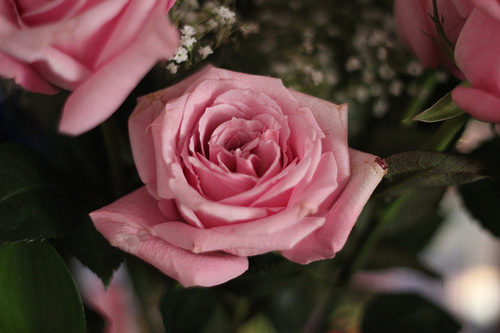

In [14]:
PIL.Image.open(str(flower_images['roses'][3]))

In [15]:
cv2.imread(str(flower_images['roses'][1])).shape

(240, 320, 3)

In [16]:
x,y=[],[]
for flower_name,images in flower_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels[flower_name])

In [17]:
x=np.array(x)
y=np.array(y)

In [18]:
x=x/255 

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0, test_size=0.40)


In [20]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

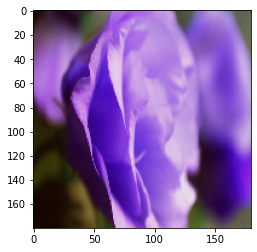

In [21]:
plt.imshow(x[0])

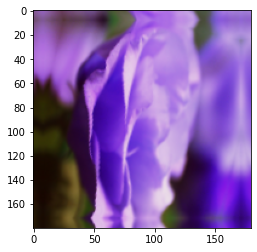

In [22]:
plt.imshow(data_augmentation(x)[0])

In [23]:
model = keras.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
52/52 [==============================] - 49s 917ms/step - loss: 1.4121 - accuracy: 0.3698
Epoch 2/30
52/52 [==============================] - 48s 921ms/step - loss: 1.0430 - accuracy: 0.5520
Epoch 3/30
52/52 [==============================] - 48s 919ms/step - loss: 0.9032 - accuracy: 0.6071
Epoch 4/30
52/52 [==============================] - 48s 917ms/step - loss: 0.7804 - accuracy: 0.6751
Epoch 5/30
52/52 [==============================] - 48s 917ms/step - loss: 0.7067 - accuracy: 0.7193
Epoch 6/30
52/52 [==============================] - 48s 917ms/step - loss: 0.7284 - accuracy: 0.6908
Epoch 7/30
52/52 [==============================] - 48s 917ms/step - loss: 0.7121 - accuracy: 0.6974
Epoch 8/30
52/52 [==============================] - 48s 918ms/step - loss: 0.6729 - accuracy: 0.7038
Epoch 9/30
52/52 [==============================] - 48s 918ms/step - loss: 0.6353 - accuracy: 0.7301
Epoch 10/30
52/52 [==============================] - 48s 920ms/step - loss: 0.5817 - accura

In [24]:
model.evaluate(x_test,y_test)

35/35 [==============================] - 8s 225ms/step - loss: 0.9356 - accuracy: 0.7493


[0.9355810880661011, 0.7493237257003784]

In [25]:
model = keras.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
52/52 [==============================] - 59s 1s/step - loss: 1.2884 - accuracy: 0.3969 - val_loss: 0.9633 - val_accuracy: 0.6032
Epoch 2/30
52/52 [==============================] - 56s 1s/step - loss: 0.8795 - accuracy: 0.6217 - val_loss: 0.8430 - val_accuracy: 0.6573
Epoch 3/30
52/52 [==============================] - 56s 1s/step - loss: 0.7767 - accuracy: 0.6837 - val_loss: 0.8348 - val_accuracy: 0.6682
Epoch 4/30
52/52 [==============================] - 56s 1s/step - loss: 0.8079 - accuracy: 0.6658 - val_loss: 0.8988 - val_accuracy: 0.6583
Epoch 5/30
52/52 [==============================] - 56s 1s/step - loss: 0.7506 - accuracy: 0.6816 - val_loss: 1.1765 - val_accuracy: 0.6023
Epoch 6/30
52/52 [==============================] - 56s 1s/step - loss: 0.7211 - accuracy: 0.6922 - val_loss: 0.7689 - val_accuracy: 0.7042
Epoch 7/30
52/52 [==============================] - 55s 1s/step - loss: 0.6608 - accuracy: 0.7392 - val_loss: 0.8603 - val_accuracy: 0.6853
Epoch 8/30
52/52 [==